In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()

--2020-08-05 20:51:11--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.4’

spam.csv.4          100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2020-08-05 20:51:12 (4.11 MB/s) - ‘spam.csv.4’ saved [503663/503663]



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Dropping the unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Renaming the columns with a better name
df.columns = ["labels", "data"]
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Creating a new column with binary labels
df["b_labels"] = df["labels"].map({"ham" : 0, "spam" : 1})

x = df["data"]
y = df["b_labels"].values

print(df.head())

  labels                                               data  b_labels
0    ham  Go until jurong point, crazy.. Available only ...         0
1    ham                      Ok lar... Joking wif u oni...         0
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...         1
3    ham  U dun say so early hor... U c already then say...         0
4    ham  Nah I don't think he goes to usf, he lives aro...         0


In [7]:
# Splitting up the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [8]:
# Converting sentences into sequences
MAX_VOCAB_SIZE = 20000

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [9]:
# get word -> index
word2index = tokenizer.word_index
V = len(word2index)
print("Length of unique words:", V)

Length of unique words: 7193


In [10]:
# Padding the sequnces so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print("Shape of the data_train Tensor:", data_train.shape)

# Get the sequence length
T = data_train.shape[1]

Shape of the data_train Tensor: (3733, 189)


In [11]:
data_test = pad_sequences(sequences_test, maxlen=T)     # Truncating the sentences as we don't know how long they can be
print("Shape of the data_test tensor:", data_test.shape)

Shape of the data_test tensor: (1839, 189)


In [13]:
# Creating the model

D = 20    # Embedding Dimensionality
M = 15    # Hidden state Dimensionality

# NOTE: We actually want the size of the embedding to be (V + 1) x D.
#       This is because the first index starts from 1 and not 0.
#       So if the final index of the matrix is V then it actually must have the size V + 1

i = Input(shape=(T, ))
x = Embedding(V + 1, D) (i)
x = LSTM(M, return_sequences=True) (x)
x = GlobalMaxPooling1D() (x)
x = Dense(1, activation="sigmoid") (x)

model = Model(i, x)

In [14]:
# Compiling the model
model.compile(
              optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

In [15]:
# Training the model
r = model.fit(data_train, y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 9s 81ms/step - loss: 0.4967 - accuracy: 0.8344 - val_loss: 0.3934 - val_accuracy: 0.8646
Epoch 2/10
117/117 [==============================] - 9s 79ms/step - loss: 0.3520 - accuracy: 0.8666 - val_loss: 0.3017 - val_accuracy: 0.8646
Epoch 3/10
117/117 [==============================] - 9s 80ms/step - loss: 0.2647 - accuracy: 0.8666 - val_loss: 0.2371 - val_accuracy: 0.8646
Epoch 4/10
117/117 [==============================] - 10s 84ms/step - loss: 0.2006 - accuracy: 0.8728 - val_loss: 0.1772 - val_accuracy: 0.9532
Epoch 5/10
117/117 [==============================] - 9s 81ms/step - loss: 0.1373 - accuracy: 0.9807 - val_loss: 0.1256 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 9s 81ms/step - loss: 0.0934 - accuracy: 0.9901 - val_loss: 0.0938 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 9s 80ms/step - loss: 0.0667 - accuracy: 0.9930 - val_loss: 0.0757 - val_accuracy: 0.984

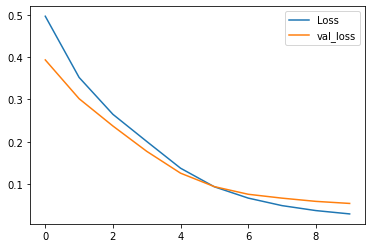

In [16]:
# Plotting loss per iteration
plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

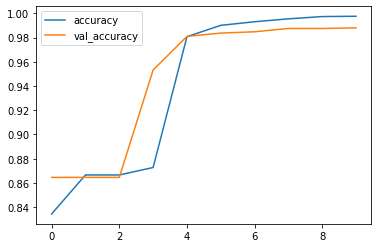

In [17]:
# Plotting accuracy per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();